In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv("Forecast_Dataset_Monthly.csv", delimiter=',', header=None, skiprows=1, 
                 names=['TTYName','PaymentDate','PaidAmount'])

In [3]:
## Cleaning up the data
#df = df.drop('TTYName', 1)
df.columns=["Area","Date","Sales"]
df.head()

,Area,Date,Sales
0,Barguna,202006,3726445.0
1,Barguna,202005,1637392.0
2,Barguna,202004,462526.0
3,Barguna,202003,2288558.0
4,Barguna,202002,3774500.0


In [4]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

In [5]:
df

,Area,Date,Sales
0,Barguna,2020-06-01,3726445.0
1,Barguna,2020-05-01,1637392.0
2,Barguna,2020-04-01,462526.0
3,Barguna,2020-03-01,2288558.0
4,Barguna,2020-02-01,3774500.0
...,...,...,...
9020,Thakurgaon 2,2010-05-01,217520.0
9021,Thakurgaon 2,2010-04-01,223280.0
9022,Thakurgaon 2,2010-03-01,519000.0
9023,Thakurgaon 2,2010-02-01,200280.0


<Figure size 1440x1440 with 0 Axes>

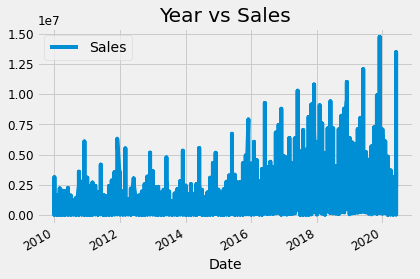

In [6]:
plt.figure(figsize=(20,20))
df.plot(x='Date',y='Sales')
plt.title('Year vs Sales')
plt.show()

In [7]:
df.set_index('Date',inplace=True)

In [8]:
y = df['Sales'].resample('MS').mean()

In [9]:
y

Date
2010-01-01    4.499484e+05
2010-02-01    3.536855e+05
2010-03-01    4.156143e+05
2010-04-01    3.498560e+05
2010-05-01    4.465787e+05
                  ...     
2020-02-01    2.229423e+06
2020-03-01    1.613906e+06
2020-04-01    8.156430e+05
2020-05-01    1.134263e+06
2020-06-01    4.273371e+06
Freq: MS, Name: Sales, Length: 126, dtype: float64

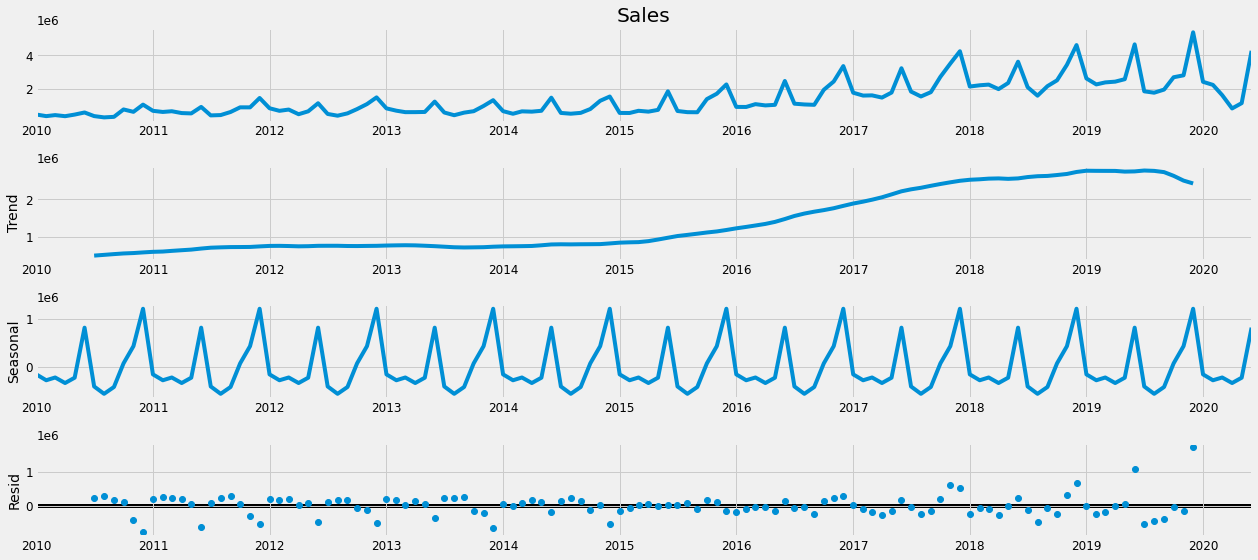

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [11]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3951.3516035939233
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3519.16417704616
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3266.4591460799065
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2915.6974367687176
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3279.2128787494253
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3242.8787605223897
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2931.120756179934
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2904.6077393967494
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3858.216279293894
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3448.676791950267
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3203.5768902579243
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2858.695305631536
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3493.471693876713
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3434.084545889318
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2913.831778326078
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2859.3081452312804
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3731.09656536201
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3331.278138724486
ARIM

In [13]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5295      0.059     -8.969      0.000      -0.645      -0.414
ar.S.L12       0.3710      0.096      3.862      0.000       0.183       0.559
sigma2      8.931e+10   1.64e-13   5.44e+23      0.000    8.93e+10    8.93e+10


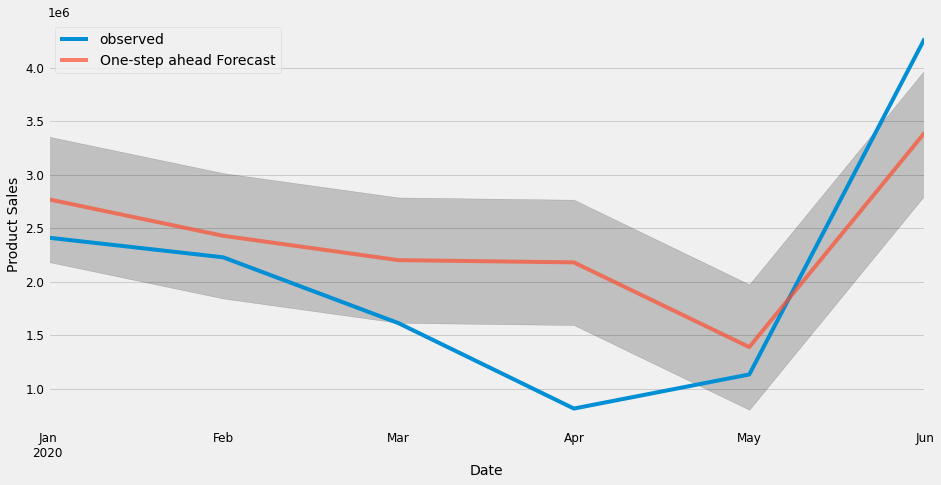

In [14]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Product Sales')
plt.legend()
plt.show()

In [15]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 537005766498.51


In [16]:
y_forecasted

Date
2020-01-01    2.773200e+06
2020-02-01    2.430546e+06
2020-03-01    2.202807e+06
2020-04-01    2.181964e+06
2020-05-01    1.390186e+06
2020-06-01    3.394067e+06
Freq: MS, dtype: float64

In [17]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 732806.77


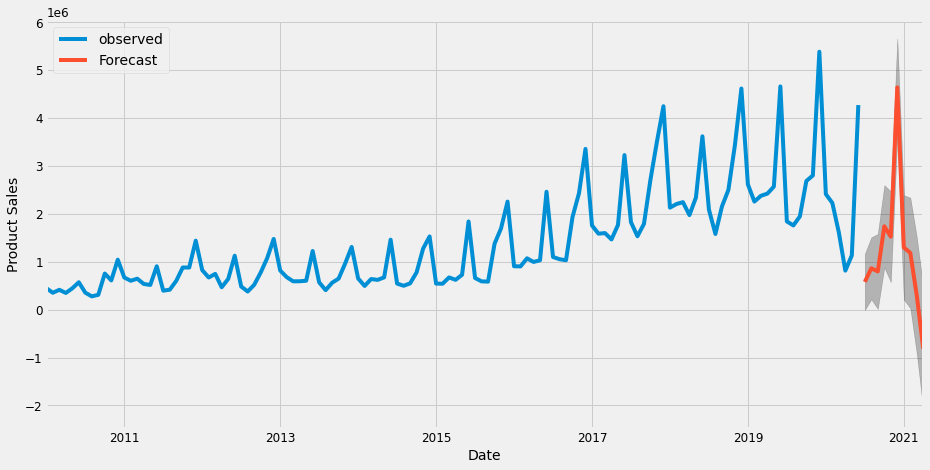

In [18]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Product Sales')
plt.legend()
plt.show()

In [19]:
pred_uc
df2 = pred_uc.predicted_mean
df2.columns=["Date","Sales"]
#df2 = pd.DataFrame(df2, columns = ['Date', 'Sales Prediction'])
df2.head(12)

2020-07-01    5.802809e+05
2020-08-01    8.647812e+05
2020-09-01    7.993461e+05
2020-10-01    1.742427e+06
2020-11-01    1.523886e+06
2020-12-01    4.643437e+06
2021-01-01    1.301136e+06
2021-02-01    1.186351e+06
2021-03-01    2.951326e+05
2021-04-01   -8.146854e+05
Freq: MS, dtype: float64

In [20]:
df2.columns

['Date', 'Sales']

In [22]:
df2.to_excel (r'C:\Users\neloy\Machine Learning\ACI\Sales Forcasting\all_Prediction.xlsx', index = False, header=True)